In [50]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas import DataFrame
import statistics
from statistics import mean
import numpy as np

import scipy.stats as stats
from scipy.stats import chi2_contingency

%matplotlib inline
color = sns.color_palette()

In [3]:
#import csv file to DataFrame 
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [5]:
#To see each cover type includes how many data samples 
type_dic = {'Cover type 0':0, 'Cover type 1':0, 'Cover type 2':0, 'Cover type 3':0, 'Cover type 4':0, 
            'Cover type 5':0, 'Cover type 6':0,'Cover type 7':0, 'Cover type more than 8':0}
for i in list(df_train['Cover_Type']):
    if i == 0:
        type_dic['Cover type 0'] += 1
    if i == 1:
        type_dic['Cover type 1'] += 1
    if i == 2:
        type_dic['Cover type 2'] += 1
    if i == 3:
        type_dic['Cover type 3'] += 1
    if i == 4:
        type_dic['Cover type 4'] += 1
    if i == 5:
        type_dic['Cover type 5'] += 1
    if i == 6:
        type_dic['Cover type 6'] += 1
    if i == 7:
        type_dic['Cover type 7'] += 1
    if i >= 8:
        type_dic['Cover type more than 8'] += 1


In [6]:
#Each Cover type contains 2160 samples in train dataset
type_dic

{'Cover type 0': 0,
 'Cover type 1': 2160,
 'Cover type 2': 2160,
 'Cover type 3': 2160,
 'Cover type 4': 2160,
 'Cover type 5': 2160,
 'Cover type 6': 2160,
 'Cover type 7': 2160,
 'Cover type more than 8': 0}

In [7]:
np.unique(np.array(df_train.Cover_Type))

array([1, 2, 3, 4, 5, 6, 7])

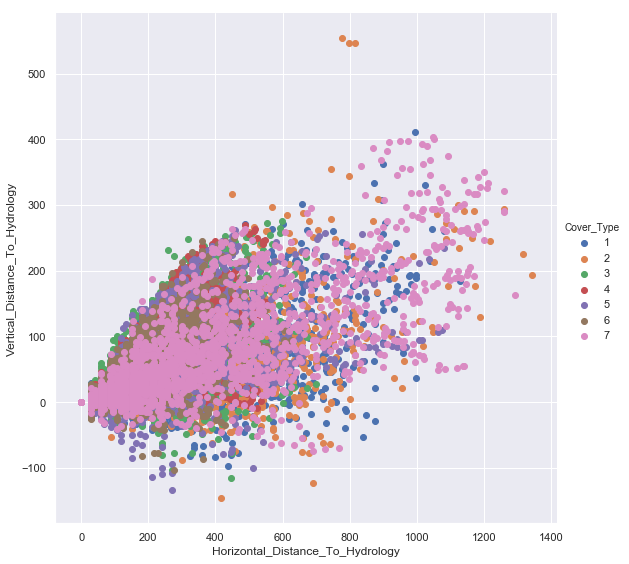

In [46]:
#Construct a scatter plot to show the distribution of cover type samples towards vertical distance to hydrology and
#horizontal distance to hydrology
figure1 = sns.FacetGrid(df_train, hue="Cover_Type", height = 8).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure1.fig.savefig("figure1.png")

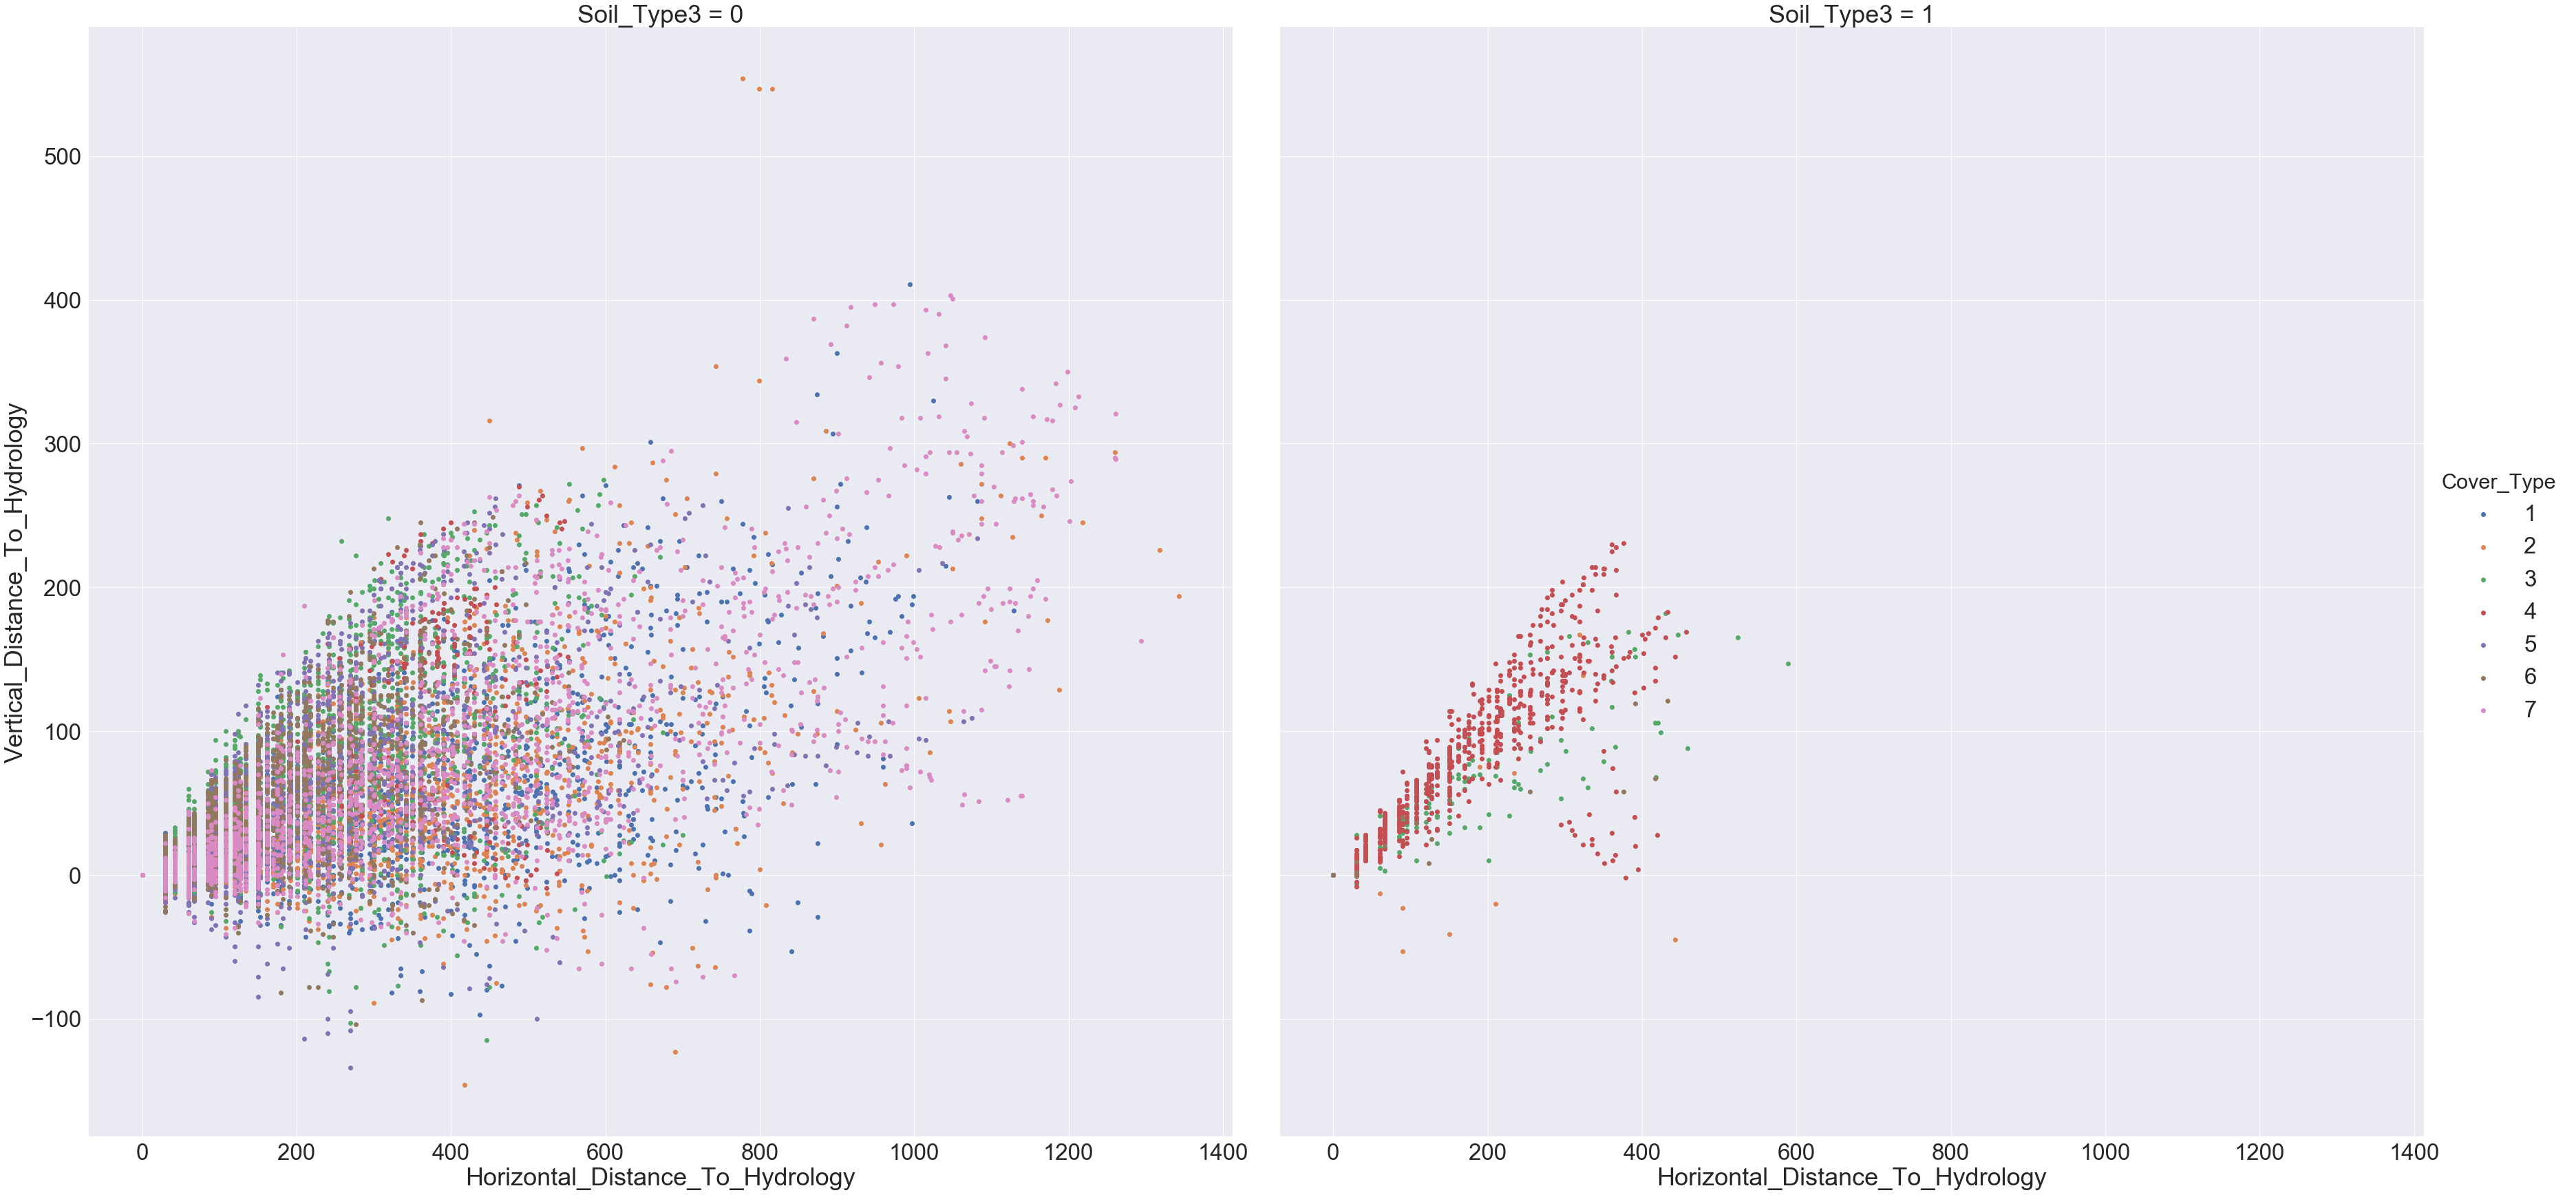

In [32]:
#Take soil type 3 as an example, see how it affects the distribution of cover types towards vertical and
#horizontal distance to hydrology
sns.set(font_scale=3)
figure2 = sns.FacetGrid(df_train, col = 'Soil_Type3', hue="Cover_Type", size= 25).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure2.fig.savefig("figure2.png")

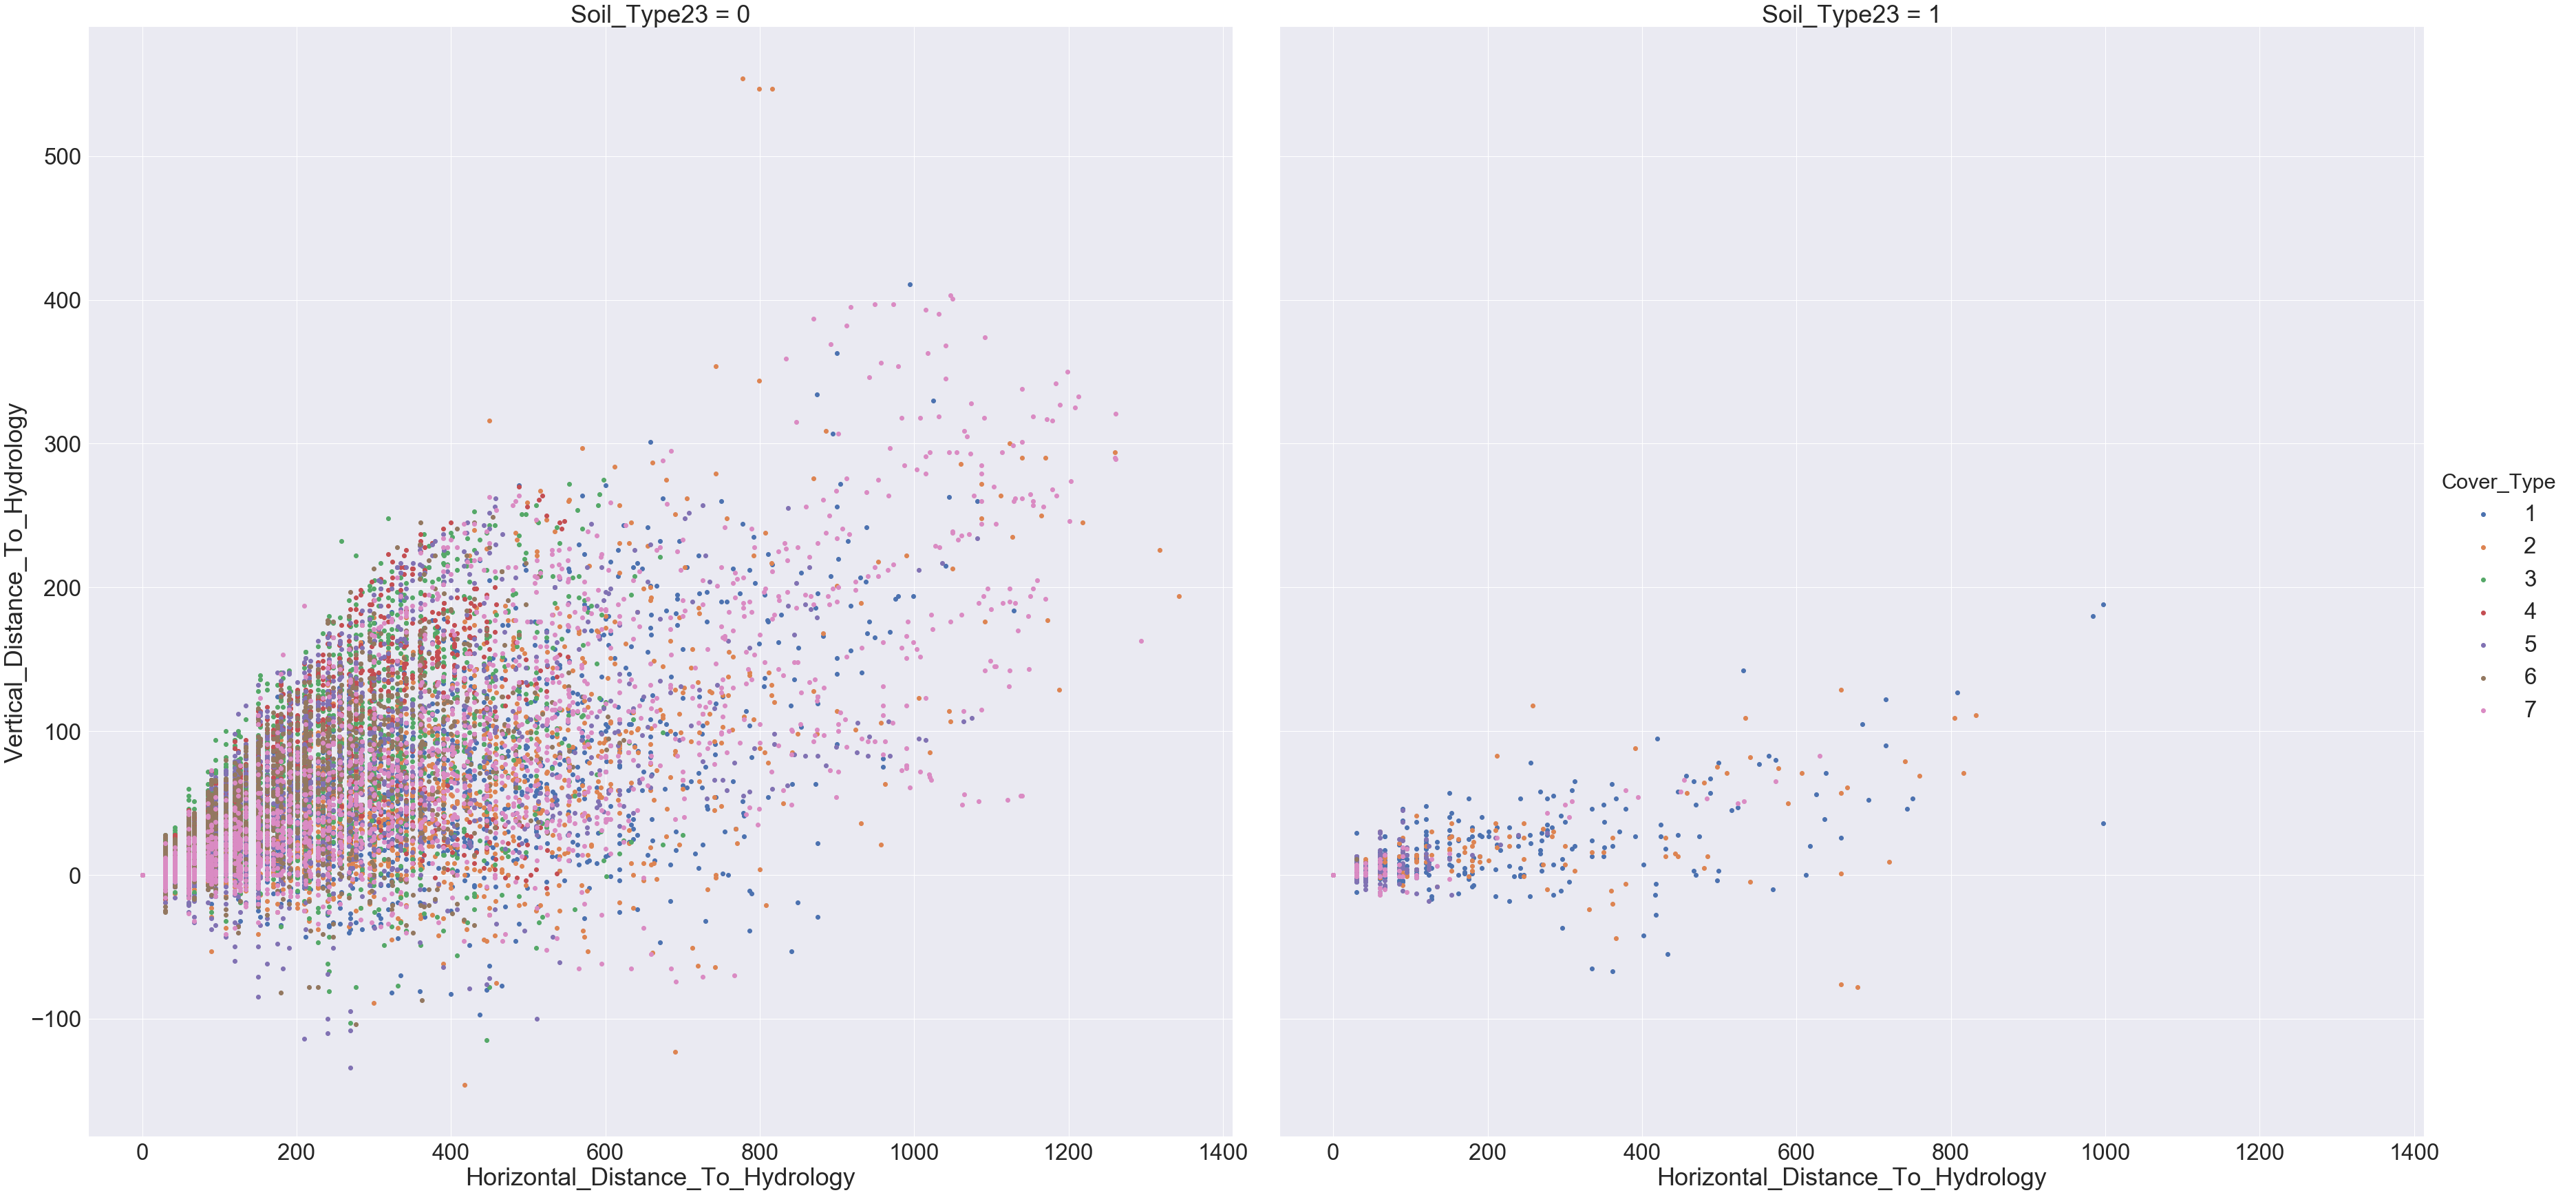

In [10]:
#Take soil type 23 as an example, see how it affects the distribution of cover types towards vertical and
#horizontal distance to hydrology
sns.set(font_scale=3)
figure3 = sns.FacetGrid(df_train, col = 'Soil_Type23', hue="Cover_Type", size= 25).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure3.fig.savefig("figure3.png")

Generally speaking, the larger horizontal and vertical distances to hydrology likely lead to two extreme conditions: Mostly, the types of trees become the maximum number of count, which is 7 types; the other conditions are that the number of types becomes extremely small that only one or two types are in the measuring regions.
Different soil types also have distinct influences when examining the relationship between distances to hydrology and tree kinds number. For example, if a region has soil type 3, it always has three or four kinds of tree types covering the region. But a region with soil type 23 has completely different case comparing with general situations: only one or two types of trees appear in the region far from hydrology; a region near hydrology usually has most types of trees.


In [11]:
#Create a new feature 'Wilderness_Area_types', transfer four dummy features of Wilderness_Area type into one feature
Wilderness_Area_types = []
for i in range(len(df_train)):
    temp_type = 0
    for j in range(1,5):
        temp_str = 'Wilderness_Area%s' %j
        have = df_train.iloc[i][temp_str]
        if have == 1:
            Wilderness_Area_types.append(temp_str)

In [71]:
#Create a new feature 'Soil_Area_types', transfer four dummy features of Wilderness_Area type into one feature
Soil_Area_types = []
for i in range(len(df_train)):
    temp_type = 0
    for j in range(1,41):
        temp_str = 'Soil_Type%s' %j
        have = df_train.iloc[i][temp_str]
        if have == 1:
            Soil_Area_types.append(j)

In [72]:
len(Soil_Area_types)

15120

In [73]:
#Add this feature to the dataframe
df_train['Wilderness_Area_types'] = Wilderness_Area_types 
df_train['Soil_Area_types'] = Soil_Area_types

In [28]:
#Build heatmap for features that are not one-hot encoding 
df_heatmap = df_train[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology",
         "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am",
          "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]].corr()

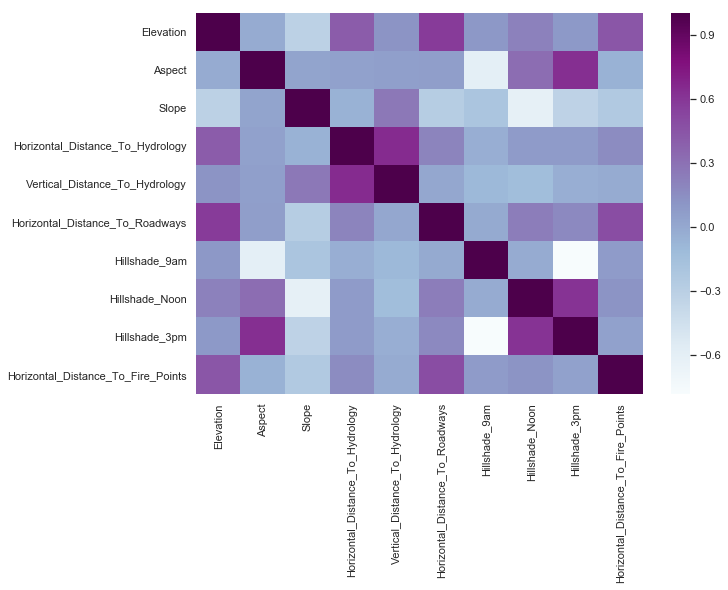

In [29]:
plt.figure(figsize=(10,7))
sns.set(font_scale= 1)
figure4 = sns.heatmap(df_heatmap,fmt=".1f",cmap="BuPu")
figure4.get_figure().savefig("figure4.png")

From correlation analysis we can say that features from the dataset are seldomly correlated with each other. The strong relations between features concentrates on the same type of features. For example, Vertical and Horizontal Distance to Hydrology features have strong positive relationships with each other, Hillshade_9am and Hillshade_3pm have strong negative relationships. Some related geographical features could also be conneted such as Aspect and Hillshade_3pm.

Heat map is not able to reflect the connections between Dummy variables like Soil Types and Wilderness Areas have little link with others. We use the histogram below to roughly show how Wilderness Areas classify forest types.

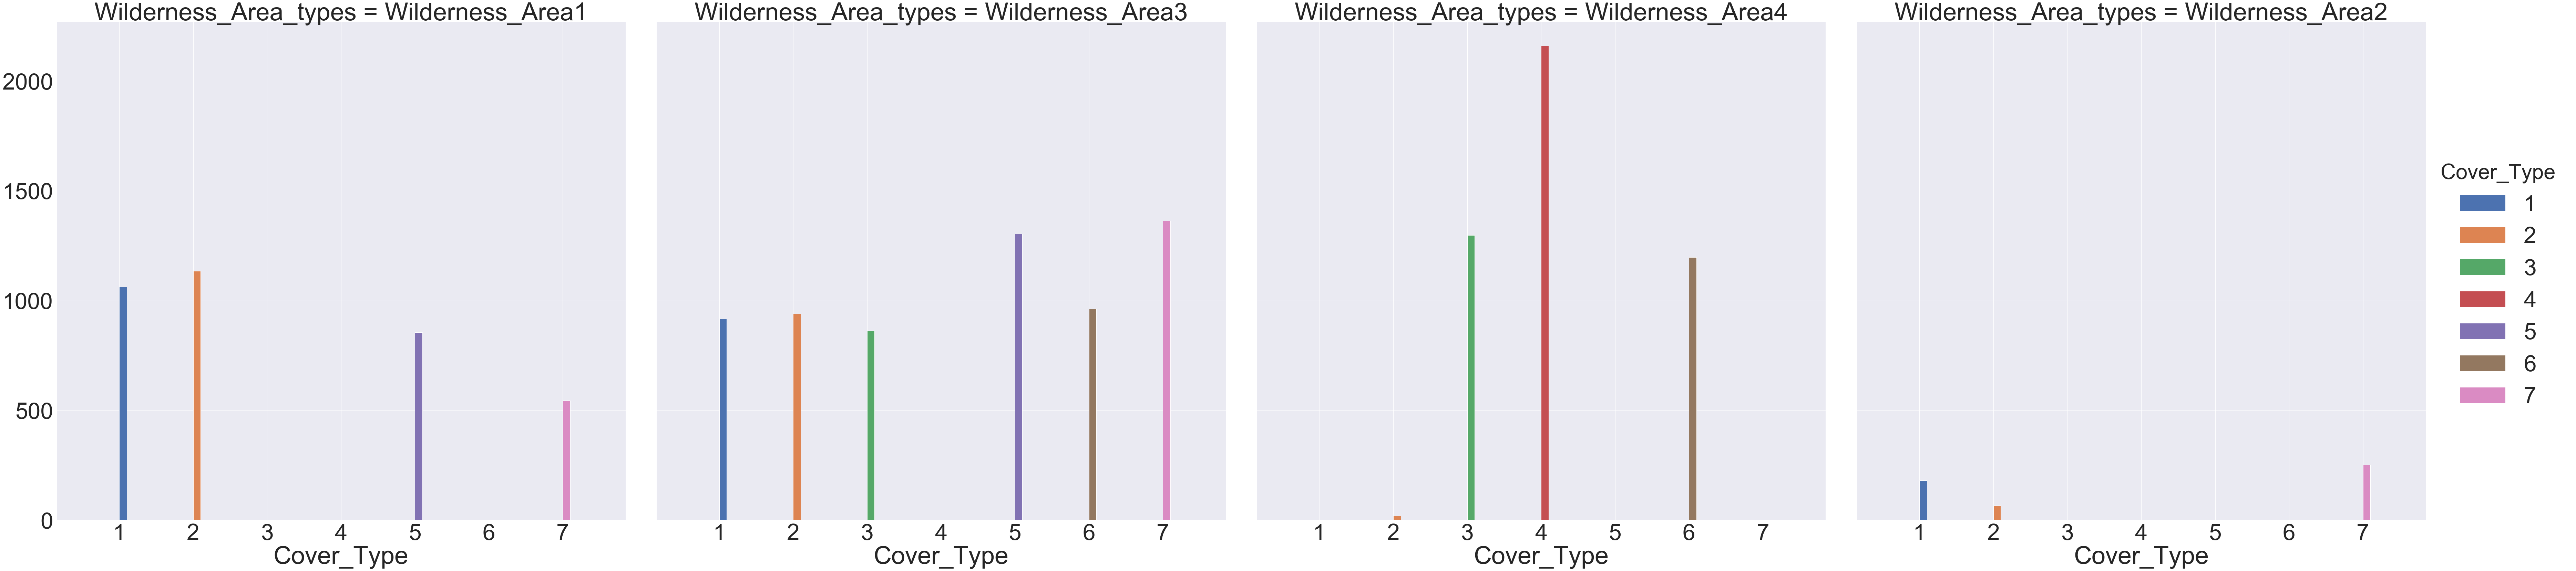

In [42]:
#Build histogram for cover type distributions in four wilderness areas
sns.set(font_scale=6)
figure5 = sns.FacetGrid(df_train, col = 'Wilderness_Area_types', hue="Cover_Type", size= 25).map(
    plt.hist, "Cover_Type").add_legend()
figure5.fig.savefig("figure5.png")

As can be seen from the figure above, there are completely different distributions of forest types between Wilderness Area2 and Wilderness Area4. In Wilderness Area2, only Type 1, Type 2 and Type 7 forest exist with very little number. Meanwhile, there are a large number of Type 3, Type 4 and Type 6 forest covering Wilderness Area 4 whose number of Type 1, Type 2 and Type 7 forests is near zero.
Another fact from the figure above is that Wilderness Area3 has the richest diversity of forest types - it includes all types of forest except Type 4 which only grows in Wilderness Area 4.

Categorical scatter plots could be limited in the information they can provide about the distribution of Cover Types within each variable. Hence we plot several figues for summarizing the distributional information in ways that is helpful for comparisons across different Cover Types wintin one variable.

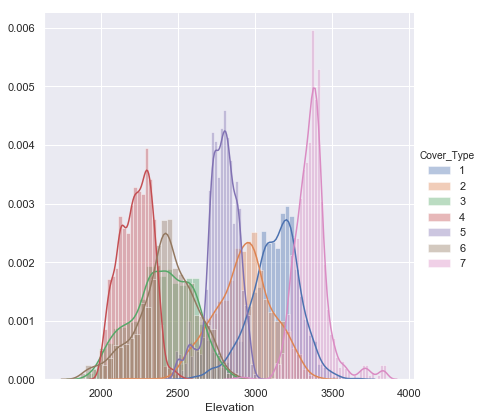

In [58]:
#Build proportion histogram for cover type distributions towards Elevation feature
figure6 = sns.FacetGrid(df_train,hue="Cover_Type",size=6)\
        .map(sns.distplot, 'Elevation').add_legend()
figure6.fig.savefig("figure6.png")

For each Cover Type, it has a clear peak at nearly the center of its distribution, which leads to a normal distribution. This distribution shows that Elevation is an very important variable to classify cover types since different level of elevation results in different forest cover types. 

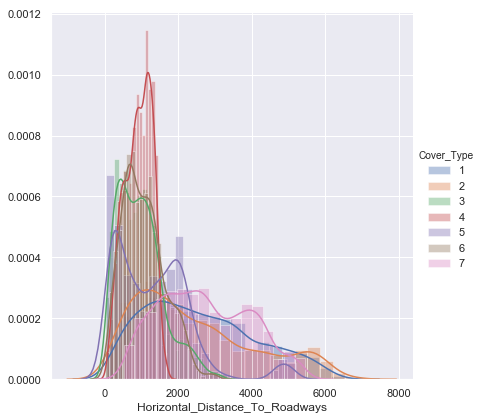

In [59]:
#Build proportion histogram for cover type distributions towards Horizontal Distance to Roadways feature
figure7 = sns.FacetGrid(df_train,hue="Cover_Type",size=6)\
        .map(sns.distplot, 'Horizontal_Distance_To_Roadways').add_legend()
figure7.fig.savefig("figure7.png")

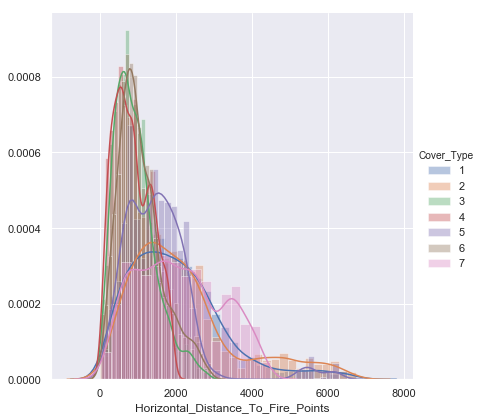

In [60]:
#Build proportion histogram for cover type distributions towards Horizontal Distance to Fire Points feature
figure8 = sns.FacetGrid(df_train,hue="Cover_Type",size=6)\
        .map(sns.distplot, 'Horizontal_Distance_To_Fire_Points').add_legend()
figure8.fig.savefig("figure8.png")

The two figures above shows the distributions of forest cover types within two variables - Horizontal Distance to Roadways and Horizontal Distance to Fire Points. They are showing similar changing trends of forest distributions. The areas that close to roadways and fire points are more likey to have variant forest types since every cover type has the distribution peak at the postition whose distances to roadways and fire points are no more than 2000. As distances become larger, the distribution of each forest cover type declines to zero.

In [49]:
#Build 40 histograms for cover type distributions, each histogram shows different distribution with or without
#one soil type
for i in range(1,41):
    sns.set(font_scale=1)
    figure9 = sns.FacetGrid(df_train, col = 'Soil_Type'+str(i), hue="Cover_Type", size= 6).map(
        plt.hist, "Cover_Type").add_legend()
    plt.close()

The figures show the distribution of 7 cover types with or without one soil type. There are 40 figures represents 40 soil types. As can be observed, one soil type variable has very little impact on cover type distributions so their existence must be connect with other variables. 

In [42]:
#According to the figures, we integrate some soil types who have similar cover types distribution, if one of these 
#soil type exist, the new feature "Combined_Soil_Type" will be labeled as 1.
Combined_Soil_Type =[]
for i in range(len(df_train)):
    whether_have = 0
    for j in [1,2,3,4,5,6,10,11,14,16,17]:
        temp_str = 'Soil_Type%s' %j
        have = df_train.iloc[i][temp_str]
        if have == 1:
            whether_have =1
    Combined_Soil_Type.append(whether_have)

In [43]:
df_train['Combined_Soil_Type'] = Combined_Soil_Type

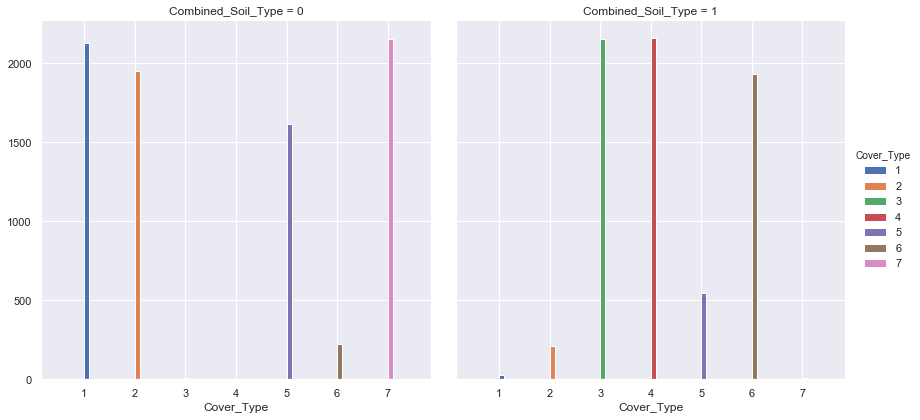

In [48]:
sns.set(font_scale=1)
figure10 = sns.FacetGrid(df_train, col = "Combined_Soil_Type", hue="Cover_Type", size= 6).map(
        plt.hist, "Cover_Type").add_legend()
figure10.fig.savefig("figure10.png")

This new feature looks powerful to classify cover types: when an area is missing these soil types, cover type 1, 2, 5 and 7 are more likely to distributed in the area; if these soil types exist, type 1 and type 7 are seldomly grow in the area while type 3, 4 and 6 are more likely to grow.

In [63]:
#using the chi square test of independence to identify the important features in the dataset.
#Return P value
def TestIndependence(df, colX,colY, alpha=0.05):
        X = df[colX].astype(str)
        Y = df[colY].astype(str)
        #compute a cross tabulation of X and Y. 
        dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
        
        dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
        
        return p

In [74]:
#Find p-value for each feature in training dataset
p_value = {}
for i in list(df_train):
    p_value[i]=TestIndependence(df_train,i,"Cover_Type")

In [75]:
#The smaller p value of the feature is, the more important the feature is 
def sort_dic(d):
    sort = []
    for k in sorted(d, key=d.get):
        sort.append((k,d[k]))
    return sort

In [76]:
#Elevation is the most important feature while 'Soil_Type7' and 'Soil Type15' are the least important feature
sort_dic(p_value)

[('Elevation', 0.0),
 ('Horizontal_Distance_To_Hydrology', 0.0),
 ('Hillshade_9am', 0.0),
 ('Wilderness_Area1', 0.0),
 ('Wilderness_Area3', 0.0),
 ('Wilderness_Area4', 0.0),
 ('Soil_Type3', 0.0),
 ('Soil_Type10', 0.0),
 ('Soil_Type29', 0.0),
 ('Soil_Type30', 0.0),
 ('Soil_Type38', 0.0),
 ('Soil_Type39', 0.0),
 ('Soil_Type40', 0.0),
 ('Cover_Type', 0.0),
 ('Wilderness_Area_types', 0.0),
 ('Cover_type_3_4_6', 0.0),
 ('Combined_Soil_Type', 0.0),
 ('Soil_Area_types', 0.0),
 ('Slope', 2.084803852254e-310),
 ('Soil_Type4', 5.273120701864027e-290),
 ('Soil_Type22', 5.04349291362086e-274),
 ('Soil_Type17', 1.0539812261664448e-241),
 ('Soil_Type13', 3.574084410570539e-234),
 ('Soil_Type23', 2.322065269232265e-231),
 ('Soil_Type12', 1.3901478908233587e-229),
 ('Vertical_Distance_To_Hydrology', 2.212914908272948e-207),
 ('Wilderness_Area2', 1.3650456093189056e-200),
 ('Soil_Type6', 8.468605792331081e-200),
 ('Aspect', 2.4799417446559276e-179),
 ('Hillshade_3pm', 4.330217481124472e-178),
 ('Soil_T